In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

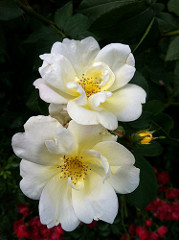

In [7]:
PIL.Image.open(str(roses[0]))

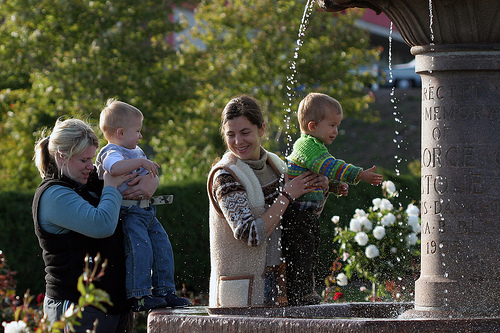

In [8]:
PIL.Image.open(str(roses[35]))

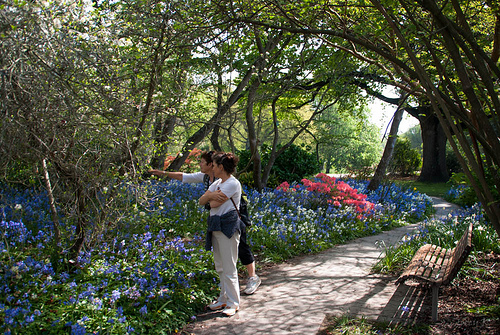

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [10]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [11]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [12]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [14]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180, 180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)
X

array([[[[  1,  16,   7],
         [  1,  16,   7],
         [  1,  17,   9],
         ...,
         [ 23,  50,  31],
         [ 25,  51,  32],
         [ 26,  52,  33]],

        [[ 10,  23,  15],
         [ 10,  23,  15],
         [  9,  22,  14],
         ...,
         [ 20,  44,  30],
         [ 23,  47,  33],
         [ 26,  50,  36]],

        [[ 13,  20,  13],
         [ 12,  20,  13],
         [ 11,  19,  12],
         ...,
         [ 21,  43,  30],
         [ 22,  45,  31],
         [ 25,  48,  34]],

        ...,

        [[ 12,  24,  18],
         [ 11,  22,  15],
         [ 12,  21,  11],
         ...,
         [  7,  14,   7],
         [  2,   8,   2],
         [  0,   2,   0]],

        [[ 19,  30,  28],
         [ 16,  26,  21],
         [ 14,  22,  15],
         ...,
         [  3,  12,   2],
         [  0,   8,   1],
         [  0,   6,   1]],

        [[ 11,  21,  20],
         [ 17,  25,  24],
         [ 21,  28,  23],
         ...,
         [  1,  12,   2],
        

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'), 
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 4s 15ms/step - loss: 1.4742 - accuracy: 0.3844
Epoch 2/30
86/86 [==============================] - 1s 16ms/step - loss: 1.0619 - accuracy: 0.5749
Epoch 3/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8677 - accuracy: 0.6639
Epoch 4/30
86/86 [==============================] - 1s 16ms/step - loss: 0.6729 - accuracy: 0.7525
Epoch 5/30
86/86 [==============================] - 1s 16ms/step - loss: 0.4689 - accuracy: 0.8365
Epoch 6/30
86/86 [==============================] - 1s 16ms/step - loss: 0.2877 - accuracy: 0.8997
Epoch 7/30
86/86 [==============================] - 1s 15ms/step - loss: 0.1633 - accuracy: 0.9477
Epoch 8/30
86/86 [==============================] - 1s 16ms/step - loss: 0.1197 - accuracy: 0.9644
Epoch 9/30
86/86 [==============================] - 1s 15ms/step - loss: 0.0580 - accuracy: 0.9862
Epoch 10/30
86/86 [==============================] - 1s 16ms/step - loss: 0.0395 - accuracy: 0.9931
Epoch 11/

In [20]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 12ms/step - loss: 2.6028 - accuracy: 0.6590


[2.6027965545654297, 0.6590414047241211]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

array([[  1.9255482 ,  29.016615  ,  14.852939  , -15.708845  ,
         -5.7695866 ],
       [ 11.512326  ,   0.81696194, -14.47676   ,  -2.686083  ,
          5.35363   ],
       [ -1.2574885 ,   9.6647835 ,  16.346256  ,  -7.2800474 ,
         -0.68182474],
       ...,
       [  0.7223439 ,  -2.1624234 ,  -4.5190663 ,   7.93871   ,
          7.6823435 ],
       [  9.386564  ,   2.7062838 ,  -9.025625  ,   1.5794069 ,
          3.1037202 ],
       [  1.0415884 , -11.160366  ,   1.7107108 ,  10.399857  ,
          3.0909376 ]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.7159281e-12, 9.9999928e-01, 7.0598134e-07, 3.7668577e-20,
       7.8080810e-16], dtype=float32)>

In [23]:
np.argmax(score)

1

In [24]:
y_test[0]

1

In [82]:
data_augmentation = keras.Sequential([
   layers.experimental.preprocessing.RandomFlip('horizontal', 
                                                            input_shape=(180,
                                                                        180,
                                                                        3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  
])

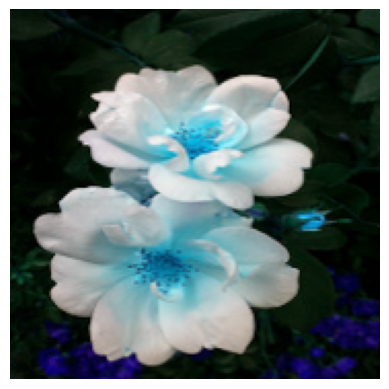

In [83]:
plt.axis('off')
plt.imshow(X[0])

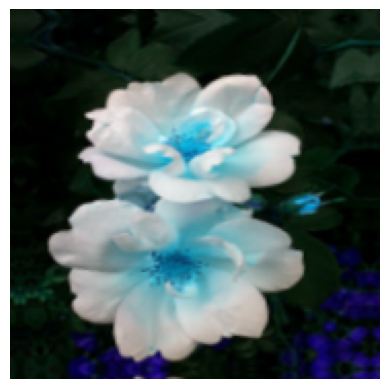

In [84]:
with tf.device('/CPU:0'):
    plt.axis('off')
    plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [88]:
num_classes = 5

model = Sequential([
    data_augmentation, 
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 2s 18ms/step - loss: 1.3410 - accuracy: 0.4390
Epoch 2/30
86/86 [==============================] - 1s 17ms/step - loss: 1.0203 - accuracy: 0.6028
Epoch 3/30
86/86 [==============================] - 1s 16ms/step - loss: 0.9127 - accuracy: 0.6515
Epoch 4/30
86/86 [==============================] - 2s 18ms/step - loss: 0.8465 - accuracy: 0.6701
Epoch 5/30
86/86 [==============================] - 2s 19ms/step - loss: 0.8059 - accuracy: 0.6839
Epoch 6/30
86/86 [==============================] - 2s 18ms/step - loss: 0.7746 - accuracy: 0.7144
Epoch 7/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7269 - accuracy: 0.7188
Epoch 8/30
86/86 [==============================] - 1s 17ms/step - loss: 0.6920 - accuracy: 0.7373
Epoch 9/30
86/86 [==============================] - 2s 19ms/step - loss: 0.6497 - accuracy: 0.7529
Epoch 10/30
86/86 [==============================] - 2s 18ms/step - loss: 0.6204 - accuracy: 0.7649
Epoch 11/

In [89]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 9ms/step - loss: 0.9702 - accuracy: 0.7484


[0.9701508283615112, 0.7483659982681274]